In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tensorflow.keras import layers # type: ignore
# from datetime import datetime
import cv2
# import time

2025-05-03 05:08:44.537250: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746248925.977049    4190 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746248926.354003    4190 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746248930.010768    4190 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746248930.010789    4190 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746248930.010791    4190 computation_placer.cc:177] computation placer alr

# Import Data

In [2]:
data_train_path='./dataset/newDatasetSplit/train'
data_test_path='./dataset/newDatasetSplit/test'
data_val_path='./dataset/newDatasetSplit/val'

In [12]:
img_width = 180
img_height = 180

In [4]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size = 32,
    validation_split=False
)

Found 3675 files belonging to 25 classes.


I0000 00:00:1745832450.723685    1028 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size = 32,
    validation_split=False
)

Found 17125 files belonging to 25 classes.


In [6]:
data_cat = data_train.class_names
print(data_cat)

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '24', '25']


In [7]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size = 32,
    validation_split=False
)

Found 3700 files belonging to 25 classes.


2025-03-31 08:28:32.734926: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


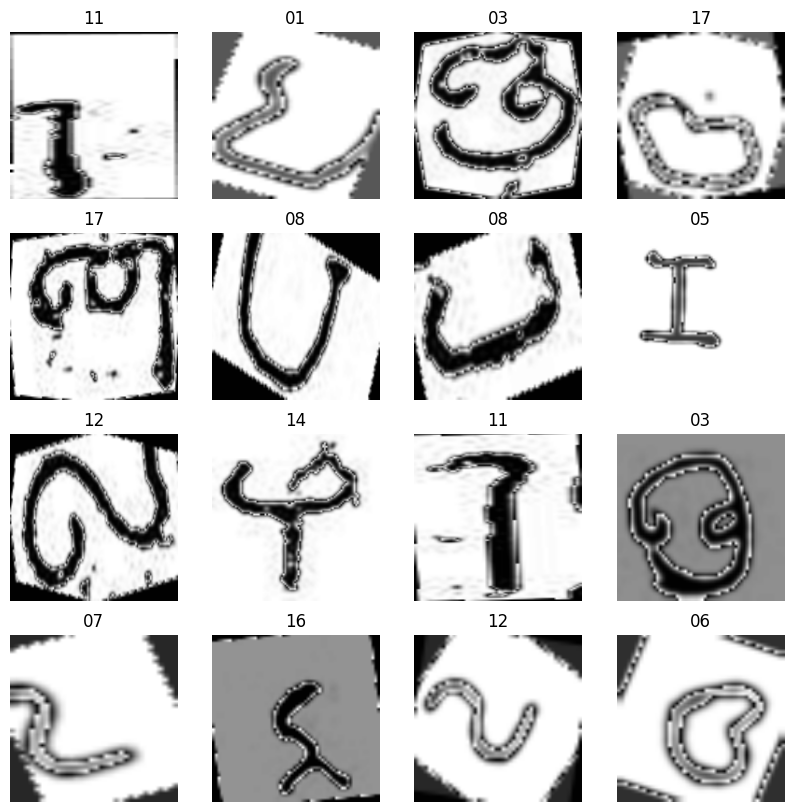

In [ ]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

# Building Model

In [8]:
from tensorflow.keras.models import Sequential # type: ignore

## Checking GPU

In [12]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Physical devices cannot be modified after being initialized


## Pushing Model in GPU

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    # Print GPU details
    print(f"Using GPU: {tf.config.experimental.get_device_details(gpus[0])['device_name']}")
    with tf.device('/GPU:0'):
        # Define your model architecture
        model = Sequential([
        layers.Rescaling(1./255),
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32,3, padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(128),
        layers.Dense(len(data_cat))

    ])

        # Compile the model
        model.compile(optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])
else:
    print("No GPU detected, running on CPU.")
    model = Sequential([
        layers.Rescaling(1./255),
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32,3, padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(128),
        layers.Dense(len(data_cat))
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

Using GPU: NVIDIA GeForce RTX 3050 Laptop GPU


## Import Model module

In [4]:
from tensorflow.keras.models import Model # type: ignore
from tensorflow.keras.models import load_model # type: ignore
epochs_size = 32

2025-05-01 10:28:49.540492: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746095331.153881    2732 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746095331.564729    2732 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746095335.099866    2732 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746095335.099892    2732 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746095335.099894    2732 computation_placer.cc:177] computation placer alr

### Fitting Data , Training & Plotting

Epoch 1/32
536/536 ━━━━━━━━━━━━━━━━━━━━ 45s 68ms/step - accuracy: 0.6248 - loss: 1.5445 - val_accuracy: 0.9377 - val_loss: 0.2217
Epoch 2/32
536/536 ━━━━━━━━━━━━━━━━━━━━ 27s 50ms/step - accuracy: 0.9273 - loss: 0.2490 - val_accuracy: 0.9431 - val_loss: 0.1898
Epoch 3/32
536/536 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.9438 - loss: 0.1955 - val_accuracy: 0.9434 - val_loss: 0.2053
Epoch 4/32
536/536 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - accuracy: 0.9507 - loss: 0.1770 - val_accuracy: 0.9589 - val_loss: 0.2085
Epoch 5/32
536/536 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.9525 - loss: 0.1949 - val_accuracy: 0.9524 - val_loss: 0.2168
Epoch 6/32
536/536 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.9472 - loss: 0.2003 - val_accuracy: 0.9491 - val_loss: 0.2854
Epoch 7/32
536/536 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.9507 - loss: 0.2404 - val_accuracy: 0.9475 - val_loss: 0.3709
Epoch 8/32
536/536 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.9467 - loss: 0.2776 - 

Text(0.5, 1.0, 'Loss')

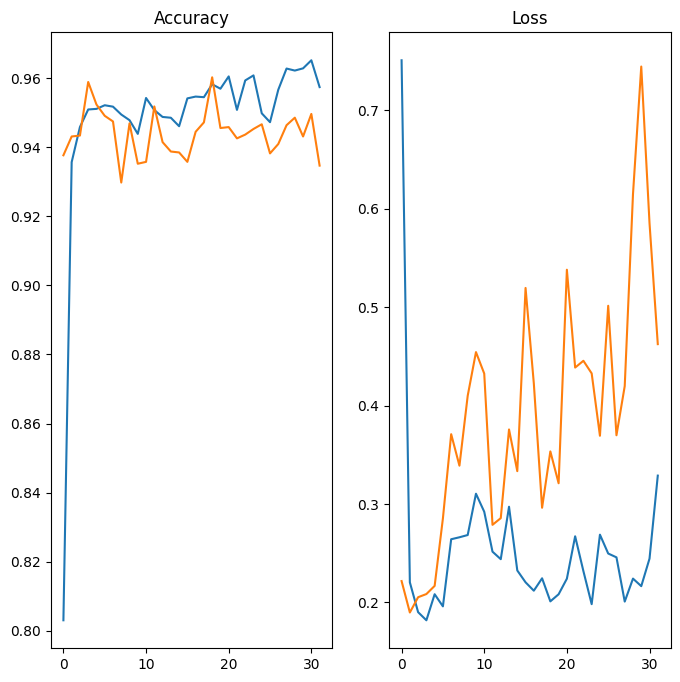

In [17]:
history = model.fit(data_train,validation_data=data_val, epochs=epochs_size)

# Plotting in Graph
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

### Save MODEL

In [ ]:
# save model
model.save('cnnModel.h5')
print('Model Saved!')

Model Saved!


# Model 2

Classes: ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '24', '25']
Epoch [1/10], Loss: 259.2432, Train Acc: 86.34%, Val Acc: 98.07%
Epoch [2/10], Loss: 26.5307, Train Acc: 98.54%, Val Acc: 99.02%
Epoch [3/10], Loss: 12.3963, Train Acc: 99.24%, Val Acc: 99.73%
Epoch [4/10], Loss: 4.4423, Train Acc: 99.75%, Val Acc: 99.46%
Epoch [5/10], Loss: 10.4002, Train Acc: 99.61%, Val Acc: 99.32%
Epoch [6/10], Loss: 18.5396, Train Acc: 99.03%, Val Acc: 99.48%
Epoch [7/10], Loss: 6.9168, Train Acc: 99.60%, Val Acc: 99.84%
Epoch [8/10], Loss: 2.5241, Train Acc: 99.85%, Val Acc: 99.70%
Epoch [9/10], Loss: 9.8947, Train Acc: 99.45%, Val Acc: 99.40%
Epoch [10/10], Loss: 3.0336, Train Acc: 99.83%, Val Acc: 99.92%


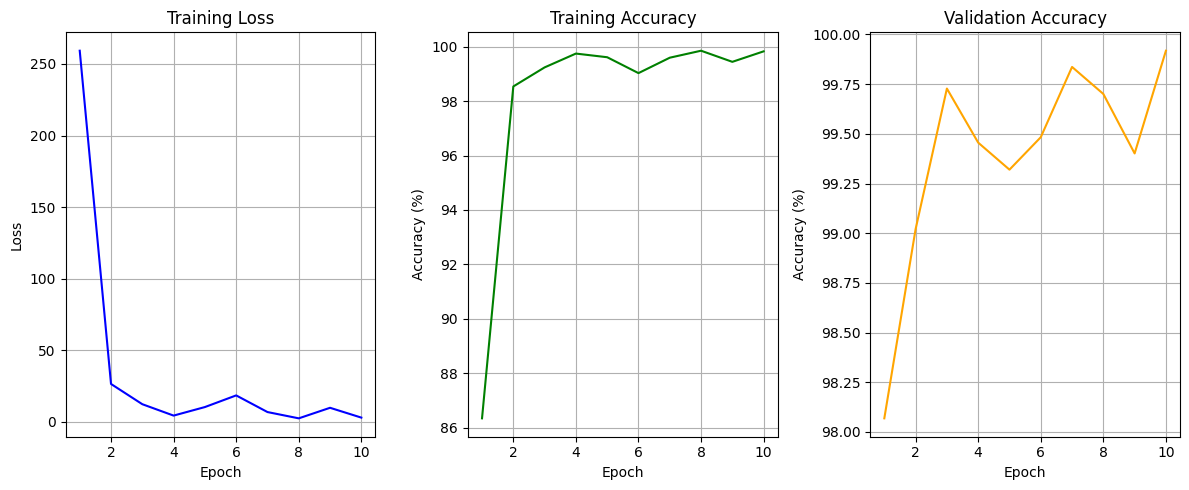

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import timm
import os
import matplotlib.pyplot as plt

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
data_train_path = './dataset/newDatasetSplit/train'
data_val_path = './dataset/newDatasetSplit/val'
data_test_path = './dataset/newDatasetSplit/test'

# Data transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

# Datasets
train_dataset = datasets.ImageFolder(root=data_train_path, transform=transform)
val_dataset = datasets.ImageFolder(root=data_val_path, transform=transform)
test_dataset = datasets.ImageFolder(root=data_test_path, transform=transform)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

# Class names
data_cat = train_dataset.classes
print("Classes:", data_cat)

# Load pre-trained MobileNetV3 Small model
model = timm.create_model('mobilenetv3_small_100.lamb_in1k', pretrained=True, num_classes=len(data_cat))
model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    total_loss, correct, total = 0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_acc = 100 * correct / total
    train_losses.append(total_loss)
    train_accuracies.append(train_acc)

    model.eval()
    correct_val, total_val = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)
    val_acc = 100 * correct_val / total_val
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%")

# Save model
torch.save(model.state_dict(), 'mobilenetv3_old_tamil.pth')

# Plot results
epochs_range = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# Training Loss
plt.subplot(1, 3, 1)
plt.plot(epochs_range, train_losses, label='Train Loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Training Accuracy
plt.subplot(1, 3, 2)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy', color='green')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)

# Validation Accuracy
plt.subplot(1, 3, 3)
plt.plot(epochs_range, val_accuracies, label='Val Accuracy', color='orange')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)

plt.tight_layout()
plt.show()


### load model

In [7]:
# savedModel=load_model('./mobilenetv3_old_tamil.pth')
# savedModel.summary()
savedModel = torch.load('./mobilenetv3_old_tamil.pth', map_location=device)
print(savedModel)

OrderedDict({'conv_stem.weight': tensor([[[[ 2.4686e-02,  2.9730e-02,  2.8654e-02],
          [ 3.0236e-02,  3.3604e-02,  2.9748e-02],
          [ 2.6463e-02,  2.3598e-02,  2.0512e-02]],

         [[-1.7137e-02, -1.8530e-02, -9.6692e-03],
          [-2.5525e-02, -3.1428e-02, -2.3131e-02],
          [-1.9600e-02, -3.1381e-02, -2.1227e-02]],

         [[ 7.8891e-03,  1.0038e-02,  1.3918e-02],
          [ 8.2255e-03,  9.6059e-03,  1.0040e-02],
          [ 8.7862e-03,  5.2524e-03,  3.8640e-03]]],


        [[[ 2.6695e-02,  3.2137e-02,  2.6560e-02],
          [ 3.5727e-02,  4.4943e-02,  3.6265e-02],
          [ 2.8448e-02,  4.3565e-02,  3.1197e-02]],

         [[-5.0655e-04, -5.3054e-03, -1.0948e-02],
          [-5.5407e-04,  5.7221e-04,  3.4328e-03],
          [-4.2402e-03,  1.2122e-02,  1.0125e-02]],

         [[-2.1596e-02, -2.1331e-02, -2.2652e-02],
          [-2.3265e-02, -2.5182e-02, -2.0850e-02],
          [-2.4677e-02, -2.0057e-02, -1.7737e-02]]],


        [[[-1.2556e-02,  2.1026e-

## Using Image File

Predicted category: 11 with accuracy: 39.66%


NameError: name 'reference_dir' is not defined

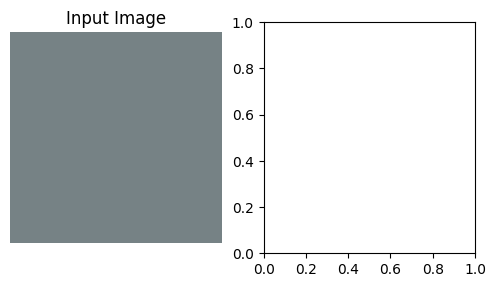

In [ ]:
from PIL import Image
import os
input_dir = './segmented_characters'
reference_dir = './dataset/OneDrive_2025-03-20/New mapping'  # Define the reference directory
img_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
img_files.sort()  # Sort for consistent order
total_images = len(img_files)

for i in range(total_images):
    image_path = os.path.join(input_dir, img_files[i])

    try:
        image = Image.open(image_path).convert("RGB")
    except Exception as e:
        print(f"Skipping {img_files[i]}: {e}")
        continue

    # Apply transform
    img_tensor = transform(image).unsqueeze(0).to(device)

    # Predict
    with torch.no_grad():
        output = model(img_tensor)
        prob = torch.nn.functional.softmax(output[0], dim=0)
        predicted_category = torch.argmax(prob).item()
        accuracy = prob[predicted_category].item() * 100

    predicted_label = data_cat[predicted_category]
    print(f"Predicted category: {predicted_label} with accuracy: {accuracy:.2f}%")

    # Plot original and reference side by side
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    axs[0].imshow(image)
    axs[0].set_title("Input Image")
    axs[0].axis('off')

    # Load corresponding reference image
    ref_img_path = os.path.join(reference_dir, predicted_label, f"{predicted_label}.png")
    if os.path.exists(ref_img_path):
        ref_img = Image.open(ref_img_path).resize((img_width, img_height))
        axs[1].imshow(ref_img)
        axs[1].set_title(f"Predicted: {predicted_label}")
        axs[1].axis('off')
        ref_img.close()
    else:
        axs[1].text(0.5, 0.5, "No ref image", ha='center', va='center')
        axs[1].axis('off')

    plt.suptitle(f"Accuracy: {accuracy:.2f}%", fontsize=10)
    plt.tight_layout()
    plt.show()

In [ ]:
from PIL import Image
import os
input_dir = './segmented_characters'
img_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
total_images = len(img_files)

for i in range(1,total_images - 1):
        image_path = os.path.join(input_dir, img_files[i])
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
        img_array = tf.keras.utils.img_to_array(image)
        img_array = tf.expand_dims(img_array, 0)  # Create a batch

        # Normalize pixel values to be between 0 and 1
        img_bat = img_array
        predict = savedModel.predict(img_bat)
        score = tf.nn.softmax(predict)
        predicted_category = np.argmax(score)
        accuracy = np.max(score) * 100
        print("Predicted category: ", data_cat[predicted_category], " with accuracy: ", accuracy)
        plt.figure(figsize=(10, 10))
        plt.subplot(i, 2, 1)
        img = Image.open(image_path)
        plt.imshow(img)
        plt.axis('off')

        plt.subplot(i, 2, 2)
        img = Image.open(f"./dataset/OneDrive_2025-03-20/New mapping/{data_cat[predicted_category]}/{data_cat[predicted_category]}.png")
        img = img.resize((img_width, img_height))  # Resize the image to match target size
        plt.imshow(img)
        plt.axis('off')
        print("Accuracy: ", accuracy)
        img.close()
        # Check if the image is None
        if image is None:
            print(f"Skipping {img_files[i]}: Not a valid image.")
            continue
